In [4]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as  np
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale

In [5]:
m = Basemap(projection='mill',
                llcrnrlat=25,
                llcrnrlon=-130,
                urcrnrlat=50,
                urcrnrlon=-60,
                resolution='l')

m.drawcoastlines()
m.drawcountries(linewidth=2)
m.drawstates(color='b')

In [8]:
data = pd.read_csv('ufo-scrubbed-geocoded-time-standardized.csv',
                       names=['datetime', 'city', 'state', 'country',
                              'shape', 'duration(seconds)', 'duration(hours/min)', 'comments',
                              'date posted', 'longitude', 'latitude'], error_bad_lines=False, warn_bad_lines=False)

data = data[data['country'] == 'us']
data.describe()

/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,latitude
count,65114.000000
mean,-95.710870
std,18.108493
min,-176.658056
25%,-115.116667
50%,-90.065556
75%,-81.023056
max,-65.831667


In [ ]:
for i in range(0, 10000):
        xpt, ypt = m(float(data['lat'][i]), float(data['lon'][i]))

        m.plot(xpt, ypt, 'r*', markersize=0.5)

plt.show()

/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes doc

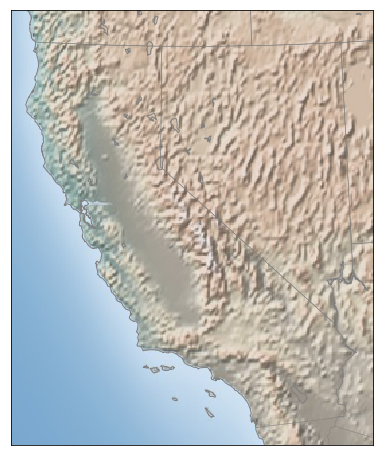

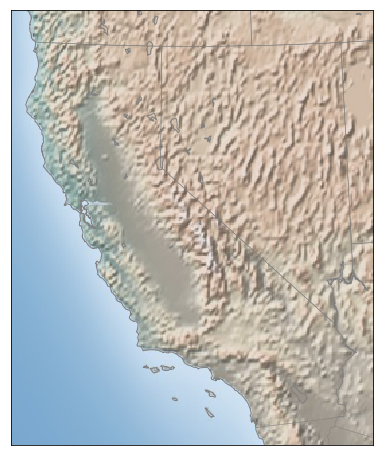

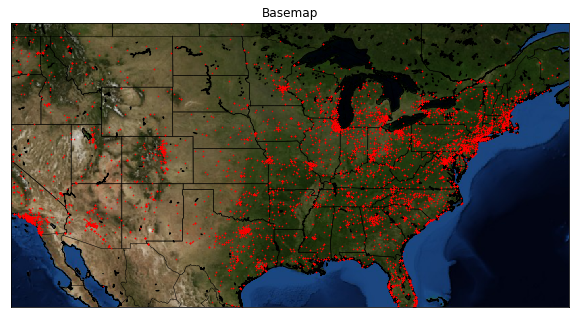

In [20]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

data = pd.read_csv('ufo-scrubbed-geocoded-time-standardized.csv',
                   names=['date', 'city', 'state', 'country',
                          'shape', 'size', 'duration', 'description',
                          'sightingsDate', 'longitude', 'latitude'])


plt.figure(figsize=(10, 10))

# m = Basemap(projection='mill', llcrnrlat = 26, urcrnrlat = 50, llcrnrlon = -120, urcrnrlon = -65, 
#              resolution = 'h')
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=32,lat_2=45,lon_0=-95)
# m = Basemap(projection='ortho', resolution=None, lat_0=50, lon_0=-90)
m.bluemarble(scale=1)
m.drawcoastlines()
m.drawcountries()
m.drawstates()

# for i in range(0, 1000):
# xpt, ypt = m(float(data['latitude'][i]), float(data['longitude'][i]))    
# xpt = [float(data['latitude'][i]) for i in range(0, 1000)]
# ypt = [float(data['longitude'][i]) for i in range(0, 1000)]

for i in range(0, 10000):
        xpt, ypt = m(float(data['latitude'][i]), float(data['longitude'][i]))

        m.plot(xpt, ypt, 'ro', markersize=0.5)

# plt.show()

# m.plot(xpt, ypt, 'r*', markersize=0.5)

plt.title('Basemap')
plt.show()

/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


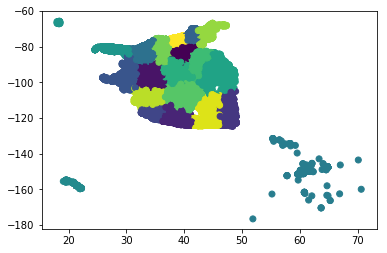

array([ 5,  5,  9, ...,  2, 19,  1], dtype=int32)

In [41]:
from subprocess import check_output

def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        return False

df = data#pd.read_csv("../input/complete.csv", error_bad_lines=False, warn_bad_lines=False)

df = pd.read_csv('ufo-scrubbed-geocoded-time-standardized.csv',
                       names=['datetime', 'city', 'state', 'country',
                              'shape', 'duration(seconds)', 'duration(hours/min)', 'comments',
                              'date posted', 'longitude', 'latitude'], error_bad_lines=False, warn_bad_lines=False)

df = df[df['country'] == 'us']


data = []

for index, row in df.iterrows():
    lat = row['latitude']
    lon = row['longitude']
    if is_number(lat) and is_number(lon):
        data.append([float(lon), float(lat)])
        
data = np.array(data)
        
model = KMeans(n_clusters=20).fit(scale(data))

plt.scatter(data[:, 0], data[:, 1], c=model.labels_.astype(float))
plt.show()

model.labels_

In [48]:
c = df.groupby('state').count()

In [17]:
plt.figure(figsize=(12,8))
Map = Basemap(projection='mill', llcrnrlat = 26, urcrnrlat = 50, llcrnrlon = -120, urcrnrlon = -65, 
             resolution = 'h')
Map.drawcoastlines()
Map.drawcountries()
Map.drawstates()
lon = df['longitude']
lat = df['latitude']
x, y = Map(list(lon.astype("float")), list(lat.astype("float")))
# Map.plot(x, y, 'go', markersize = 1, alpha = 0.5, color = 'blue');
x,y
# Map.plot(x, y, 'r*', markersize=0.5)


# plt.title('Basemap')
# plt.show()

KeyboardInterrupt: 

In [37]:
import pandas as pd
data = pd.read_csv('ufo-scrubbed-geocoded-time-standardized.csv',
                   names=['date', 'city', 'state', 'country',
                          'shape', 'size', 'duration', 'description',
                          'sightingsDate', 'longitude', 'latitude'])
data = data[data['country'] == 'us']



/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [1]:
from sklearn.cluster import DBSCAN
uid = 4902

#1deg at 40deg latitude is 111034.61 meters
#set radius at 300 mt
eps = 260/111034.61 #The maximum distance between two samples for them to be considered as in the same neighborhood.

# data = df_merged[df_merged['uid']==uid][['lon','lat','venue_id']]
db = DBSCAN(eps=eps, min_samples=3, n_jobs=1).fit(np.array(data[['longitude','latitude']])) # atleast 3 points in a cluster


core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
data['dbscan_cluster'] =  db.labels_
data['dbscan_core']    = core_samples_mask
print("# clusters: {}".format(len(set(data['dbscan_cluster']))))

plt.style.use('seaborn-white')
fig = plt.figure()
fig.set_size_inches(20, 20)

# empty = pd.DataFrame(columns=['longitude', 'latitude'])
# geomap(empty, 13, 2, 'k', 0.1)

##############################
plt.figure(figsize=(10, 10))

# m = Basemap(projection='mill', llcrnrlat = 26, urcrnrlat = 50, llcrnrlon = -120, urcrnrlon = -65, 
#              resolution = 'h')
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=32,lat_2=45,lon_0=-95)

# m = Basemap(projection='ortho', resolution=None, lat_0=50, lon_0=-90)
m.bluemarble(scale=1)
m.drawcoastlines()
m.drawcountries()
m.drawstates()

# for i in range(0, 1000):
# xpt, ypt = m(float(data['latitude'][i]), float(data['longitude'][i]))    
# xpt = [float(data['latitude'][i]) for i in range(0, 1000)]
# ypt = [float(data['longitude'][i]) for i in range(0, 1000)]

# for i in range(0, 10000):
#         xpt, ypt = m(float(data['latitude'][i]), float(data['longitude'][i]))

#         m.plot(xpt, ypt, 'ro', markersize=0.5)

##############################

unique_labels = sorted(set(data['dbscan_cluster']))

for k in unique_labels:
    xy = data[data['dbscan_cluster']==k]
    xy.head()

# #     xpt, ypt = m(float(data['latitude'][i]), float(data['longitude'][i]))
    
#     for i in range(0, 10000):
#         xpt, ypt = m(float(data['latitude'][i]), float(data['longitude'][i]))

# #         m.plot(xpt, ypt, 'ro', markersize=0.5)
    
#         m.plot(xpt, ypt, 'kD' if k < 0 else 'o', markersize=8)
# plt.show()

NameError: name 'np' is not defined

/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


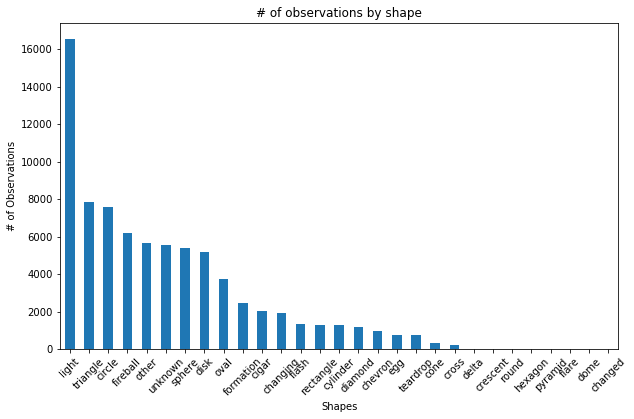

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('ufo-scrubbed-geocoded-time-standardized.csv',
                   names=['date', 'city', 'state', 'country',
                          'shape', 'size', 'duration', 'description',
                          'sightingsDate', 'longitude', 'latitude'])

data['shape'].value_counts().plot(kind='bar',figsize=(10,6));
plt.xticks(rotation=45)
plt.xlabel('Shapes')
plt.ylabel('# of Observations')
plt.title('# of observations by shape');

plt.show()

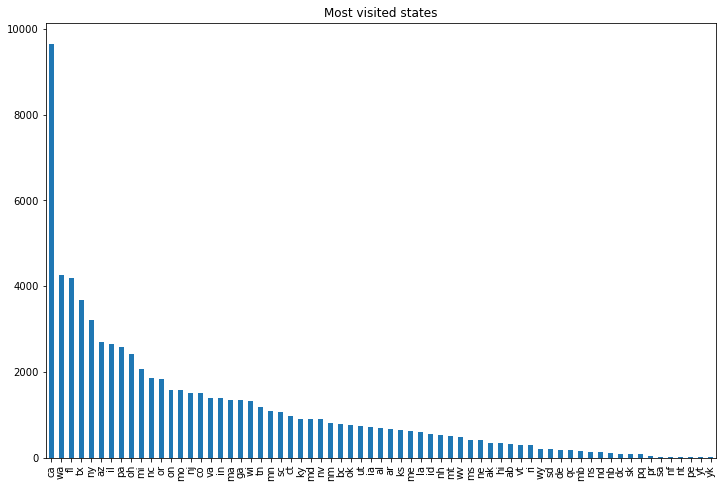

In [8]:
data['state'].value_counts().plot(kind='bar',figsize=(12,8));
plt.title('Most visited states');
plt.show()